# **Capstone Project:** **SMS** **Spam** **Detection** **Using** **Multiple** **Text** **Embedding** **Techniques**

## **Context**
SMS spam is a growing issue that affects millions of mobile users worldwide. These unwanted and potentially harmful messages can lead to fraud, phishing, and misuse of personal data. This capstone project focuses on applying Natural Language Processing (NLP) techniques to automatically classify SMS messages as spam or ham (not spam).

## **Problem Statement**
The goal of this project is to build an efficient machine learning model that can accurately detect spam SMS messages. This requires proper text preprocessing, vectorization, model selection, and performance evaluation.

## **Objectives**

*   Build a spam classification model using the SMS dataset.
*   Apply multiple text embedding techniques (BoW, TF-IDF, Word2Vec, GloVe, BERT).
*   Compare the performance of these embeddings for accurate spam detection.
*   Understand how different text representations impact classification results.





## **Installing the Necessary Libraries**

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.6 MB/s eta 0:00:00


In [2]:
!pip install sentence-transformers

In [3]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# to remove common stop words
from nltk.corpus import stopwords

# to perform lemmatization
from nltk.stem import WordNetLemmatizer

# to create Bag of Words and TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to import BERT embeddings
from sentence_transformers import SentenceTransformer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

# to compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Loading the Dataset**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## **Data** **Overview**

In [6]:
df.shape


(5572, 2)

In [7]:
df.isnull().sum()


,0
label,0
text,0


In [8]:
df.duplicated().sum()


np.int64(403)

In [9]:
df = df.drop_duplicates()
df.shape


(5169, 2)

In [10]:
df['label'].value_counts()


,count
label,
ham,4516
spam,653


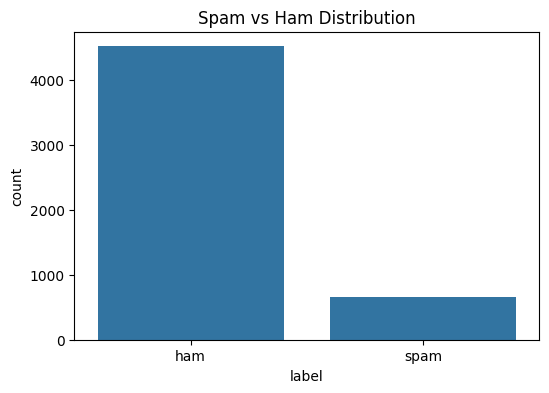

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label")
plt.title("Spam vs Ham Distribution")
plt.show()


## **Text Preprocessing**

In [12]:
# Basic text cleaning
# converting text to lowercase
df['text'] = df['text'].str.lower()

# removing special characters
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)

# removing extra whitespace
df['text'] = df['text'].str.replace('\s+', ' ', regex=True).str.strip()

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3793623732.py:6: SyntaxWarning: invalid escape sequence '\w'
  df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
/tmp/ipython-input-3793623732.py:9: SyntaxWarning: invalid escape sequence '\s'
  df['text'] = df['text'].str.replace('\s+', ' ', regex=True).str.strip()


,label,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives around here though


In [14]:
# stopword removal & lemmatization
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['text'] = df['text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,text
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though


In [15]:
# separating the features (text messages) and the target labels (spam/ham)
X = df['text']
y = df['label']
# splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Defining the Evaluation Function for Model Performance**

In [16]:
def evaluate_and_plot(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))
    print("Recall:", recall_score(y_test, y_pred, pos_label='spam'))
    print("F1-score:", f1_score(y_test, y_pred, pos_label='spam'))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    return y_pred


## **Bag-of-Words (BoW): Feature Extraction and Model Evaluation**

In [17]:
bow_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

X_train_bow = bow_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_bow = bow_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))


=== BoW ===
Accuracy: 0.9642166344294004
Precision: 0.8461538461538461
Recall: 0.9103448275862069
F1-score: 0.8770764119601329


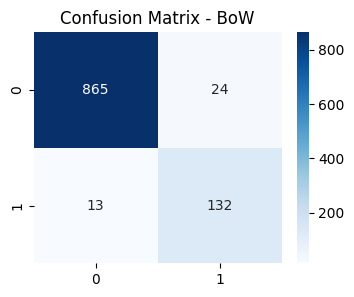

In [18]:
print("=== BoW ===")
lr_bow = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_bow.fit(X_train_bow, y_train)

y_pred_bow = evaluate_and_plot(lr_bow, X_test_bow, y_test, "BoW")


## **N-grams (1,2): Feature Extraction and Model Evaluation**

In [19]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,2), token_pattern=r'\b\w+\b')

X_train_ngram = ngram_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_ngram = ngram_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))


=== N-grams ===
Accuracy: 0.9787234042553191
Precision: 0.9300699300699301
Recall: 0.9172413793103448
F1-score: 0.9236111111111112


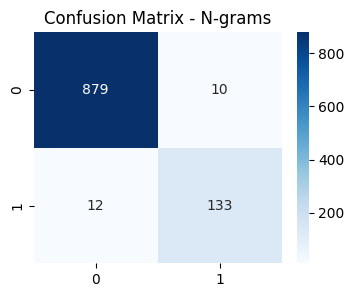

In [20]:
print("=== N-grams ===")
lr_ngram = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_ngram.fit(X_train_ngram, y_train)

y_pred_ngram = evaluate_and_plot(lr_ngram, X_test_ngram, y_test, "N-grams")


## **TF-IDF: Feature Extraction and Model Evaluation**

In [21]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test.apply(lambda x: " ".join(x)))


=== TF-IDF ===
Accuracy: 0.9671179883945842
Precision: 0.8827586206896552
Recall: 0.8827586206896552
F1-score: 0.8827586206896552


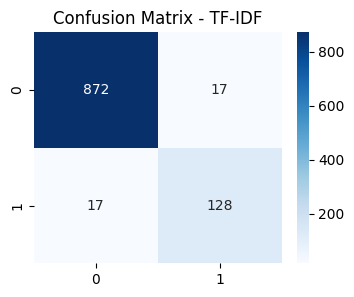

In [22]:
print("=== TF-IDF ===")
lr_tfidf = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = evaluate_and_plot(lr_tfidf, X_test_tfidf, y_test, "TF-IDF")


## **Word2Vec: Feature Extraction and Model Evaluation**

In [23]:
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

def get_w2v_vector(tokens):
    vecs = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vecs) == 0:
        return np.zeros(100)
    return np.mean(vecs, axis=0)

X_train_w2v = np.array([get_w2v_vector(tokens) for tokens in X_train])
X_test_w2v = np.array([get_w2v_vector(tokens) for tokens in X_test])


=== Word2Vec ===
Accuracy: 0.9400386847195358
Precision: 0.7515151515151515
Recall: 0.8551724137931035
F1-score: 0.8


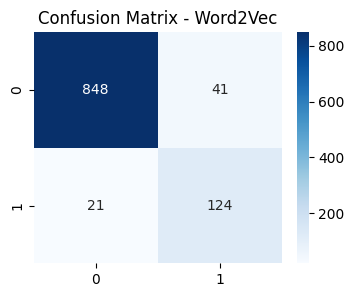

In [24]:
print("=== Word2Vec ===")
lr_w2v = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_w2v.fit(X_train_w2v, y_train)

y_pred_w2v = evaluate_and_plot(lr_w2v, X_test_w2v, y_test, "Word2Vec")


## **GloVe: Feature Extraction and Model Evaluation**

In [26]:
# Download GloVe embeddings
!wget -nc http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

# Load GloVe embeddings
glove_vectors = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector


--2025-11-15 14:29:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-15 14:29:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-15 14:29:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [27]:
def get_glove_vector(tokens):
    vecs = [glove_vectors[word] for word in tokens if word in glove_vectors]
    if len(vecs) == 0:
        return np.zeros(100)
    return np.mean(vecs, axis=0)

X_train_glove = np.array([get_glove_vector(tokens) for tokens in X_train])
X_test_glove = np.array([get_glove_vector(tokens) for tokens in X_test])


=== GloVe ===
Accuracy: 0.9429400386847195
Precision: 0.7621951219512195
Recall: 0.8620689655172413
F1-score: 0.8090614886731392


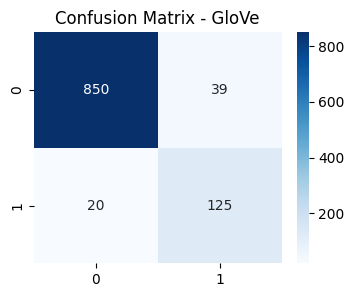

In [28]:
print("=== GloVe ===")
lr_glove = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_glove.fit(X_train_glove, y_train)

y_pred_glove = evaluate_and_plot(lr_glove, X_test_glove, y_test, "GloVe")


## **BERT: Feature Extraction and Model Evaluation**

In [29]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

X_train_sentences = X_train.apply(lambda x: " ".join(x))
X_test_sentences = X_test.apply(lambda x: " ".join(x))

X_train_bert = bert_model.encode(X_train_sentences.tolist(), show_progress_bar=True)
X_test_bert = bert_model.encode(X_test_sentences.tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/130 [00:00<?, ?it/s]

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

=== BERT ===
Accuracy: 0.9632495164410058
Precision: 0.8407643312101911
Recall: 0.9103448275862069
F1-score: 0.8741721854304636


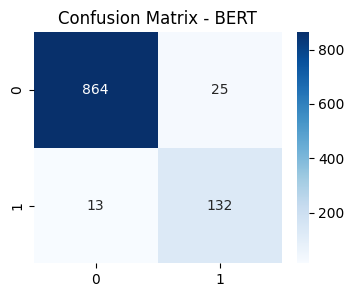

In [30]:
print("=== BERT ===")
lr_bert = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_bert.fit(X_train_bert, y_train)

y_pred_bert = evaluate_and_plot(lr_bert, X_test_bert, y_test, "BERT")


## **Comparison of All Embedding Techniques Using All Metrics**

In [31]:
comparison = pd.DataFrame({
    "Embedding": ["BoW", "N-grams", "TF-IDF", "Word2Vec", "GloVe", "BERT"],

    "Accuracy": [
        accuracy_score(y_test, y_pred_bow),
        accuracy_score(y_test, y_pred_ngram),
        accuracy_score(y_test, y_pred_tfidf),
        accuracy_score(y_test, y_pred_w2v),
        accuracy_score(y_test, y_pred_glove),
        accuracy_score(y_test, y_pred_bert)
    ],

    "Precision": [
        precision_score(y_test, y_pred_bow, pos_label='spam'),
        precision_score(y_test, y_pred_ngram, pos_label='spam'),
        precision_score(y_test, y_pred_tfidf, pos_label='spam'),
        precision_score(y_test, y_pred_w2v, pos_label='spam'),
        precision_score(y_test, y_pred_glove, pos_label='spam'),
        precision_score(y_test, y_pred_bert, pos_label='spam')
    ],

    "Recall": [
        recall_score(y_test, y_pred_bow, pos_label='spam'),
        recall_score(y_test, y_pred_ngram, pos_label='spam'),
        recall_score(y_test, y_pred_tfidf, pos_label='spam'),
        recall_score(y_test, y_pred_w2v, pos_label='spam'),
        recall_score(y_test, y_pred_glove, pos_label='spam'),
        recall_score(y_test, y_pred_bert, pos_label='spam')
    ],

    "F1-score": [
        f1_score(y_test, y_pred_bow, pos_label='spam'),
        f1_score(y_test, y_pred_ngram, pos_label='spam'),
        f1_score(y_test, y_pred_tfidf, pos_label='spam'),
        f1_score(y_test, y_pred_w2v, pos_label='spam'),
        f1_score(y_test, y_pred_glove, pos_label='spam'),
        f1_score(y_test, y_pred_bert, pos_label='spam')
    ]
})

comparison


,Embedding,Accuracy,Precision,Recall,F1-score
0,BoW,0.964217,0.846154,0.910345,0.877076
1,N-grams,0.978723,0.930070,0.917241,0.923611
2,TF-IDF,0.967118,0.882759,0.882759,0.882759
3,Word2Vec,0.940039,0.751515,0.855172,0.800000
4,GloVe,0.942940,0.762195,0.862069,0.809061
5,BERT,0.963250,0.840764,0.910345,0.874172


## **Visualizing Accuracy, Precision, Recall, and F1-score for All Embedding Techniques**

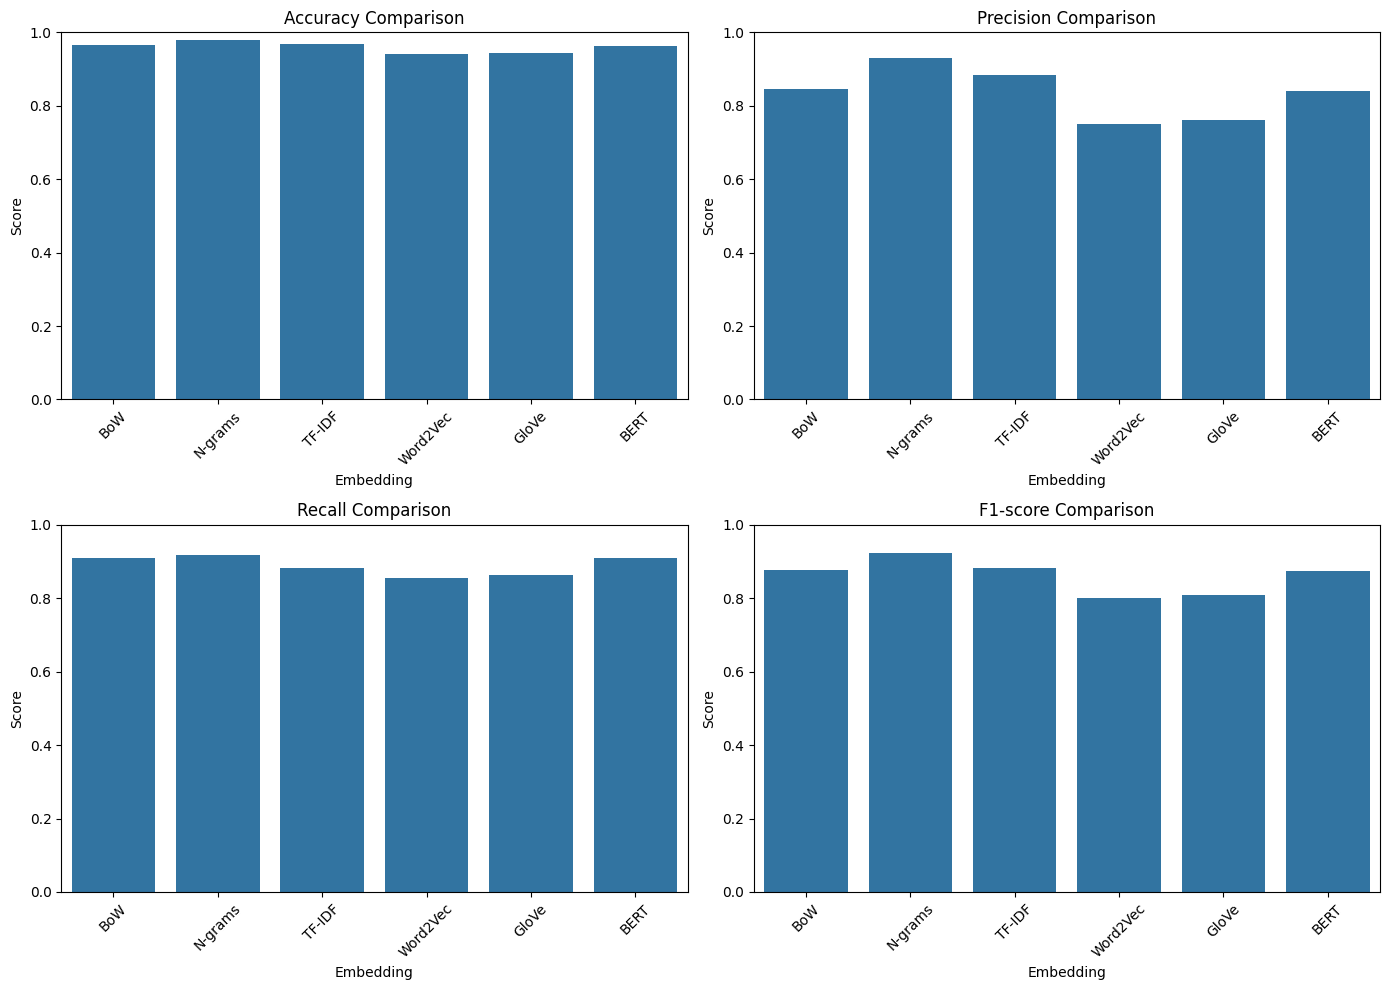

In [32]:
# preparing data in long format for easier plotting
metrics_melted = comparison.melt(
    id_vars="Embedding",
    value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
    var_name="Metric",
    value_name="Score"
)

# plotting all metrics in a single figure with subplots
plt.figure(figsize=(14,10))

metrics_list = ["Accuracy", "Precision", "Recall", "F1-score"]

for i, metric in enumerate(metrics_list, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],
                x="Embedding", y="Score")
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=45)
    plt.ylim(0,1)

plt.tight_layout()
plt.show()



## **Conclusion**
*   N-grams (1,2) achieved the best performance, making it the most effective embedding technique for SMS spam detection in this dataset.
*   Bag-of-Words also performed strongly, showing that simple keyword-based patterns work well for short SMS messages.
*   BERT, Word2Vec, and GloVe did not outperform classical methods because the dataset is small and the messages are short and pattern-driven.
*   The project showed that classical statistical embeddings can be more effective than deep learning models on small, simple text datasets.
*   F1-score was the most reliable evaluation metric, as it correctly handled the imbalance between ham and spam messages.